<a href="https://colab.research.google.com/github/AV-BOLT/Used_car_price_prediction/blob/master/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание проекта #


Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение, чтобы привлечь новых клиентов. В нём можно будет узнать рыночную стоимость своего автомобиля.

Постройте модель, которая умеет её определять. В вашем распоряжении данные о технических характеристиках, комплектации и ценах других автомобилей.

Критерии, которые важны заказчику:
качество предсказания;
время обучения модели;
время предсказания модели.

Инструкция по выполнению проекта

Основные шаги:
Загрузите данные, путь к файлу: /datasets/autos.csv.
Изучите данные. Заполните пропущенные значения и обработайте аномалии в столбцах. Если среди признаков имеются неинформативные, удалите их.
Подготовьте выборки для обучения моделей.
Обучите разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробуйте разные гиперпараметры.
Проанализируйте время обучения, время предсказания и качество моделей.

Опираясь на критерии заказчика, выберете лучшую модель, проверьте её качество на тестовой выборке.


Описание данных
Данные находятся в файле autos.csv.

Признаки
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя
- Целевой признак Price — цена (евро)



Критерии, которые важны заказчику:
- качество предсказания;
- время обучения модели;
- время предсказания модели.

**Основные шаги:**

Обучите разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробуйте разные гиперпараметры.
Проанализируйте время обучения, время предсказания и качество моделей.
Опираясь на критерии заказчика, выберете лучшую модель, проверьте её качество на тестовой выборке.

**Примечания:**

- Для оценки качества моделей применяйте метрику RMSE.
Значение метрики RMSE должно быть меньше 2500.
- Самостоятельно освойте библиотеку LightGBM и её средствами постройте модели градиентного бустинга.

# Загрузка данных и библиотек

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
#import optuna

In [120]:
!pip install catboost
import catboost

In [121]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool, cv
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [210]:
data = pd.read_csv('/content/drive/MyDrive/Projects_YP/Used_car_price_prediction/autos.csv')
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [124]:
data.shape

(354369, 16)

Данные загружены, имеется 354 369 объектов и 16 признаков.


# Предобработка и анализ

In [125]:
# посмотрим на дынные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [126]:
data.dtypes.to_frame()

,0
DateCrawled,object
Price,int64
VehicleType,object
RegistrationYear,int64
Gearbox,object
Power,int64
Model,object
Kilometer,int64
RegistrationMonth,int64
FuelType,object


- В данных имеются пропуски
- Имеются признаки с типом данных который не соответствует значениям в признаке
- Названия необходимо привести к единообразной форме (строчный регистр и _ для разделения)
- Данные представлены категориальными, числовыми признаками, datetime.


Этапы предобработки данных:

**приведение типов данных** к требуемому формату datetime (без времени):
- DateCrawled
- DateCreated
- LastSeen

**приведение названия признаков**  к единообразному формату

**пропуски**:
- Анализ причин возникновения пропусков
- Рассмотрение возможных способов обработки таких признаков(заглушка, использование inputer, оставить как есть если позволяет модель, заполнение синтетическими данными, заполнение на основании остальных признаков и т.д.)

примерный алгоритм обработки **категориальные признаки**,  значит необходимо обрабатывать их - приведение к единому написанию (регистр, пробелы/символы/цифры и тд.)
- проверка на дупликаты (явные и неявные)

**Числовые признаки** проверим
- на аномалии и редкие значения
-



## Приведение значений к требуемому формату

In [150]:
# Посмотрим, если они в одном формате представлены
#то их одновременно приведем к формоту datetime
data[['DateCrawled', 'DateCreated', 'LastSeen']].head()

,DateCrawled,DateCreated,LastSeen
0,2016-03-24 11:52:17,2016-03-24 00:00:00,2016-04-07 03:16:57
1,2016-03-24 10:58:45,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,2016-03-31 00:00:00,2016-04-06 10:17:21


In [151]:
date_columns = ['DateCrawled', 'DateCreated', 'LastSeen']

In [211]:
data[date_columns] = data[date_columns]\
            .applymap(lambda x: pd.to_datetime(x).date())
data[date_columns].head()

,DateCrawled,DateCreated,LastSeen
0,2016-03-24,2016-03-24,2016-04-07
1,2016-03-24,2016-03-24,2016-04-07
2,2016-03-14,2016-03-14,2016-04-05
3,2016-03-17,2016-03-17,2016-03-17
4,2016-03-31,2016-03-31,2016-04-06


Значения в признаках, содержащих дату приведены к формату `datetime64`, что позволит работать нам с датой.

## Приведение названий признаков к змеиному формату

In [212]:
data.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

Необходимо:
- привести к строчному регистру
- добавить _ между словами

In [213]:
data.columns = ['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gear_box',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type', 'brand',
       'repaired', 'date_created', 'pictures_amount', 'postal_code',
       'last_seen']

In [214]:
data.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year',
       'gear_box', 'power', 'model', 'kilometer', 'registration_month',
       'fuel_type', 'brand', 'repaired', 'date_created', 'pictures_amount',
       'postal_code', 'last_seen'],
      dtype='object')

Названия исправлены.

## Анализ пропущенных значений

Заполнять все пропуски я буду заглушками, которые отличимы от реальных данных.

Синтетические данные я подбирать не буду.

Для каждого признака с пропущенными значениями я построю график чтобы оценить какие значения содержатся и какой масштаб (для числовых признаков).

- Числовые признаки числом, отличимым по масштабу от реальных данных -1
- Категориальные признаки заглушкой **no_info**

In [215]:
def pass_value_barh(df):
    try:(
        (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh',
                  figsize = (19,6),
                  rot = -0,
                  legend = False,
                  fontsize = 16,
                  xticks=[i/10 for i in range(0, 1000, 50)],
                  color='skyblue')
            .set_title('Количество пропущенных значений' + "\n", fontsize = 22, color = 'Black')
        );
    except:
        print('пропусков не осталось')

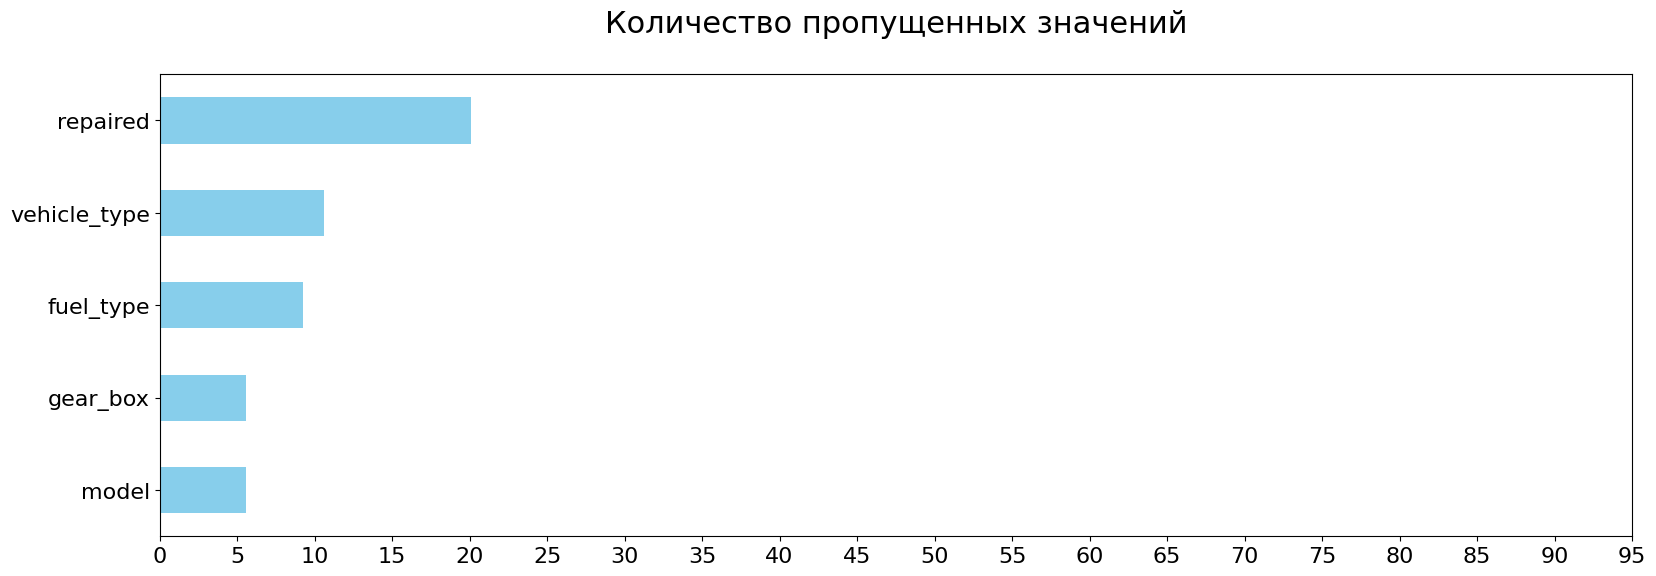

In [216]:
pass_value_barh(data)

### repaired

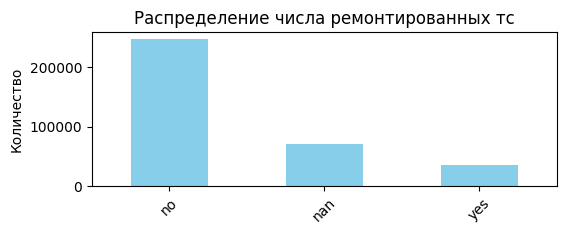

In [217]:
data['repaired'].value_counts(dropna=False).plot(kind='bar',
                                                 color='skyblue',
                                                 figsize = (6,2))
plt.title('Распределение числа ремонтированных тс')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

### vehicle_type

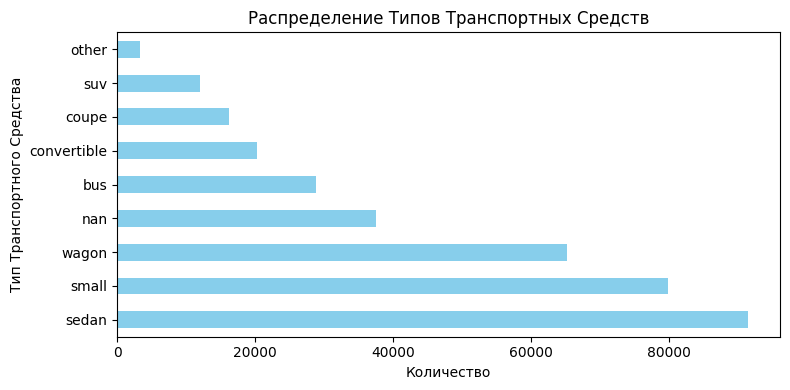

In [218]:
data['vehicle_type'].value_counts(dropna=False).plot(kind='barh',
                                                     color='skyblue',
                                                     figsize = (8,4))
plt.title('Распределение Типов Транспортных Средств')
plt.ylabel('Тип Транспортного Средства')
plt.xlabel('Количество')
plt.tight_layout()
plt.show()

### fuel_type

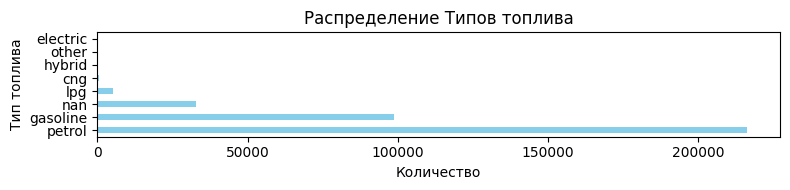

In [219]:
data['fuel_type'].value_counts(dropna=False).plot(kind='barh',
                                                  color='skyblue',
                                                  figsize = (8,2))
plt.title('Распределение Типов топлива')
plt.ylabel('Тип топлива')
plt.xlabel('Количество')
plt.tight_layout()
plt.show()

### gear_box

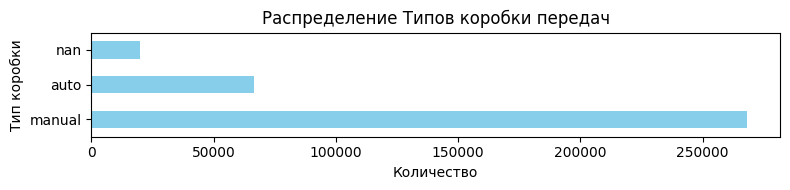

In [220]:
data['gear_box'].value_counts(dropna=False).plot(kind='barh',
                                                  color='skyblue',
                                                  figsize = (8,2))
plt.title('Распределение Типов коробки передач')
plt.ylabel('Тип коробки')
plt.xlabel('Количество')
plt.tight_layout()
plt.show()

### model

следующий признак один из важнейших, но график строить нецелесообразно из-за того, что в данном признаке содержится слишком много уникальных названий моделей автомобилей.

Значения категориальные и следовательно заполняем заглушкой no_info

### Заполняем пропуски

In [221]:
data = data.fillna('no_info')

пропусков не осталось


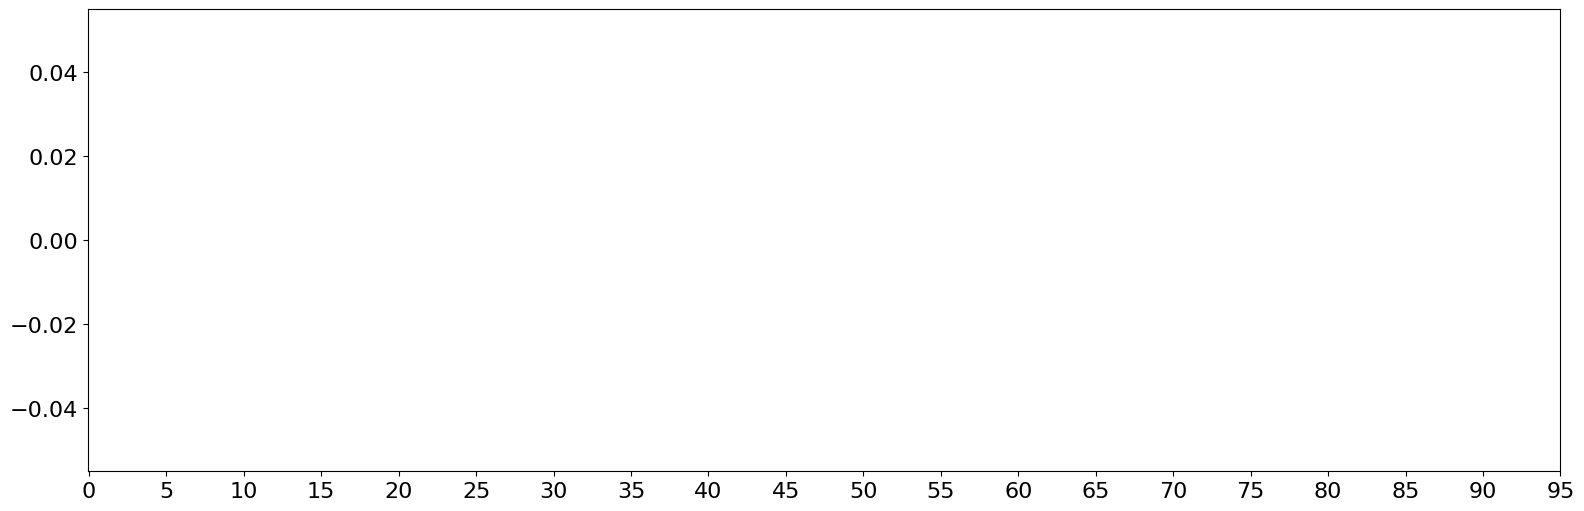

In [222]:
pass_value_barh(data)

In [223]:
data.head()

,date_crawled,price,vehicle_type,registration_year,gear_box,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,pictures_amount,postal_code,last_seen
0,2016-03-24,480,no_info,1993,manual,0,golf,150000,0,petrol,volkswagen,no_info,2016-03-24,0,70435,2016-04-07
1,2016-03-24,18300,coupe,2011,manual,190,no_info,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07
2,2016-03-14,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,no_info,2016-03-14,0,90480,2016-04-05
3,2016-03-17,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17
4,2016-03-31,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06


Пропуски заполнены.

## Анализ признаков на аномалии

In [224]:
data.dtypes

date_crawled          object
price                  int64
vehicle_type          object
registration_year      int64
gear_box              object
power                  int64
model                 object
kilometer              int64
registration_month     int64
fuel_type             object
brand                 object
repaired              object
date_created          object
pictures_amount        int64
postal_code            int64
last_seen             object
dtype: object

Для анализа распределения воспользуемся графиками.

Для этого заранее подготовим переменные в которых сохраним названия признаков содержащих одинаковый тип данных.

In [236]:
categorical_columns = data.select_dtypes(include = 'object').columns
numeric_columns = data.select_dtypes(include = 'number').columns

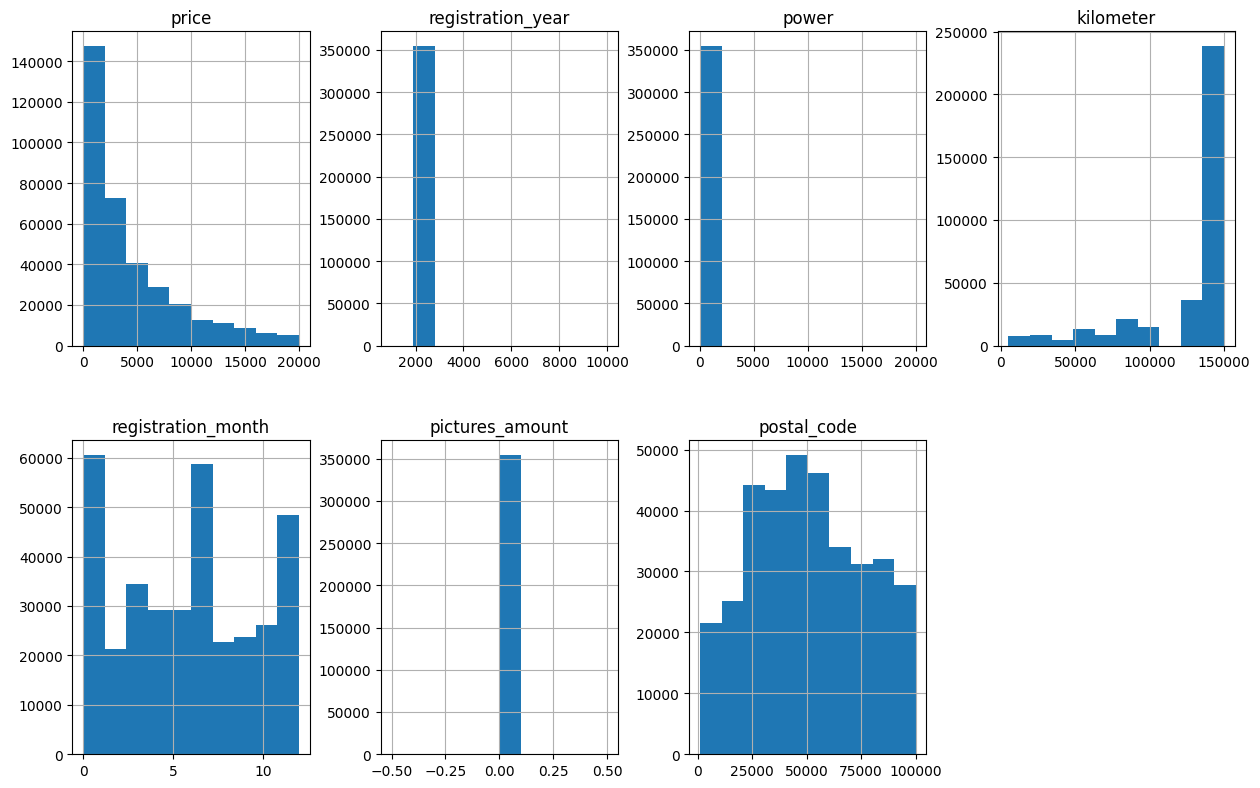

In [226]:
# Оценим визуально признаки, их распределение
data[numeric_columns].hist(layout=(4,4),figsize=(15, 20));

- price нужно изучить на наличие аномалий
- в признаке registration_year очевидно имееются аномалии
- признак power нужно проверить на систему в которой выражена мощность.
- kilometer имеются редкие значения, но аномалий не видно на этом графике
- pictures_amount содержат отрицательные значения, что является аномалией
- sale_month, postal_code в обработке и анализе не нуждаются


Пропуски имеются исключительно в категориальных признаках.

### price

In [227]:
# проанализируем признак sellingprice
data['price'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
price,354369.0,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0


для стоимости такой разбег по максимальной стоимости вполне допустим. Посмотрим на самые дешевые объекты

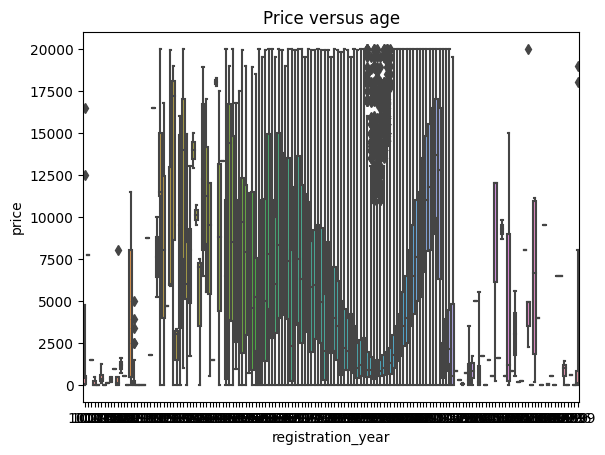

In [228]:
sns.boxplot(x='registration_year',
            y='price',
            data=data[['price','registration_year']],
            whis=10)

plt.xlabel('registration_year')
plt.ylabel('price')
plt.title('Price versus age');

In [234]:
datetime_columns


Index([], dtype='object')

In [233]:
data[datetime_columns]

""
0
1
2
3
4
...
354364
354365
354366
354367


In [230]:
data['price'].quantile([.01, .02,.1,.50]).to_frame().transpose()


,0.01,0.02,0.10,0.50
price,0.0,0.0,499.0,2700.0


In [ ]:
data.loc[data['price']<0].shape[0]

Общая картира дешевых объектов не противоречит логике:
- представлены старые автомобили, плохого состояния и с большим пробегом
- объекты с отрицательным значением стоимости отсутствуют

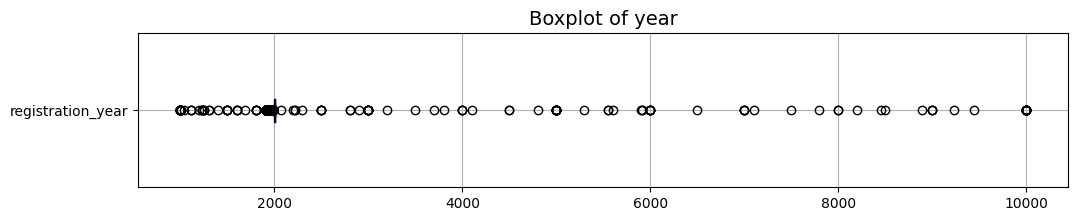

In [232]:
data.boxplot(column=['registration_year'], figsize=(12, 2),
             vert=False,
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            whiskerprops=dict(color='gray'),
            medianprops=dict(color='darkblue'),
            capprops=dict(color='gray')).set_title('Boxplot of year', fontsize=14);

In [ ]:
data['registration_year'].unique()

In [175]:
numeric_columns.to_list()

['price',
 'registration_year',
 'power',
 'kilometer',
 'registration_month',
 'pictures_amount',
 'postal_code']

In [178]:
for col in numeric_columns.to_list():
  print(col)
  print(data[col].value_counts().sort_values())
  print ()

price
10985        1
12870        1
2201         1
9769         1
12180        1
         ...  
1200      4594
1000      4649
1500      5394
500       5670
0        10772
Name: price, Length: 3731, dtype: int64

registration_year
3500        1
4100        1
1919        1
8200        1
1927        1
        ...  
2006    19900
2001    20124
2005    22109
1999    22728
2000    24490
Name: registration_year, Length: 151, dtype: int64

power
1241        1
902         1
682         1
2009        1
7529        1
        ...  
101     13298
150     14590
60      15897
75      24023
0       40225
Name: power, Length: 712, dtype: int64

kilometer
10000       1222
20000       3975
30000       4436
40000       4911
50000       6232
5000        6397
60000       7444
70000       8593
80000      10047
90000      11567
100000     14882
125000     36454
150000    238209
Name: kilometer, dtype: int64

registration_month
2     21267
8     22627
1     23219
9     23813
11    24186
12    24289
10    26099

**condition**

In [ ]:
train.loc[train['odometer']<30000, 'condition'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
condition,119019.0,4.006383,0.81693,1.0,3.7,4.2,4.6,5.0


In [ ]:
train.loc[(train['odometer']<30000) & (train['condition'].isna()), 'condition'].shape[0]

640

In [ ]:
# заполним пропуски в признаке condition для объектов с пробегом менее 30 тыс средним значение равным 4
train.loc[(train['odometer']<30000) & (train['condition'].isna()), 'condition'] = train.loc[
    (train['odometer']<30000) & (train['condition'].isna()), 'condition'].fillna(4)

In [ ]:
test.loc[(test['odometer']<30000) & (test['condition'].isna()), 'condition'] = test.loc[
    (test['odometer']<30000) & (test['condition'].isna()), 'condition'].fillna(4)

In [ ]:
train.loc[(train['odometer']<30000) & (train['condition'].isna()), 'condition'].shape[0]

0

,count,mean,std,min,25%,50%,75%,max
condition,119659.0,4.006349,0.814742,1.0,3.7,4.2,4.6,5.0


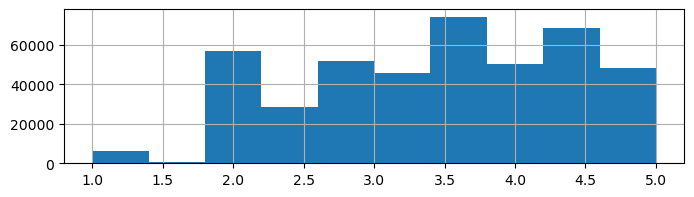

In [ ]:
# проверим распределение выборки после заполнения пропусков
train['condition'].hist(figsize=(8,2));
train.loc[train['odometer']<30000, 'condition'].describe().to_frame().transpose()

параметры не изменились

In [ ]:
train.loc[(train['odometer']<40000) & (train['odometer']>30000), 'condition'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
condition,55337.0,3.760945,0.754033,1.0,3.4,3.9,4.3,5.0


In [ ]:
train.loc[((train['odometer']<40000) & (train['odometer']>30000) & train['condition'].isna()), 'condition'] = train.loc[
    ((train['odometer']<40000) & (train['odometer']>30000) & train['condition'].isna()), 'condition'].fillna(3.76)

In [ ]:
test.loc[((test['odometer']<40000) & (test['odometer']>30000) & test['condition'].isna()), 'condition'] = test.loc[
    ((test['odometer']<40000) & (test['odometer']>30000) & test['condition'].isna()), 'condition'].fillna(3.76)

,count,mean,std,min,25%,50%,75%,max
condition,55626.0,3.76094,0.752071,1.0,3.4,3.9,4.3,5.0


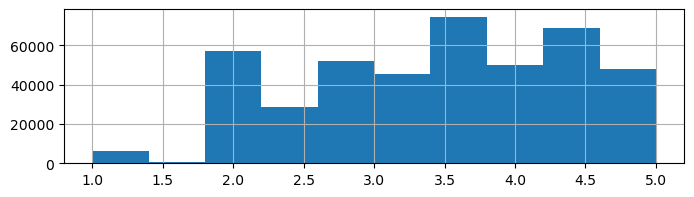

In [ ]:
# проверим распределение выборки после заполнения пропусков
train['condition'].hist(figsize=(8,2));
train.loc[(train['odometer']<40000) & (train['odometer']>30000), 'condition'].describe().to_frame().transpose()

In [ ]:
train.loc[(train['odometer']>40000) & (train['odometer']<50000), 'condition'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
condition,37744.0,3.650397,0.76257,1.0,3.2,3.7,4.2,5.0


In [ ]:
train.loc[((train['odometer']>40000) & (train['odometer']<50000) & train['condition'].isna()), 'condition'] = train.loc[
    ((train['odometer']>40000) & (train['odometer']<50000) & train['condition'].isna()), 'condition'].fillna(3.65)

In [ ]:
test.loc[((train['odometer']>40000) & (test['odometer']<50000) & test['condition'].isna()), 'condition'] = test.loc[
    ((test['odometer']>40000) & (test['odometer']<50000) & test['condition'].isna()), 'condition'].fillna(3.65)

,count,mean,std,min,25%,50%,75%,max
condition,38010.0,3.650395,0.759897,1.0,3.2,3.7,4.2,5.0


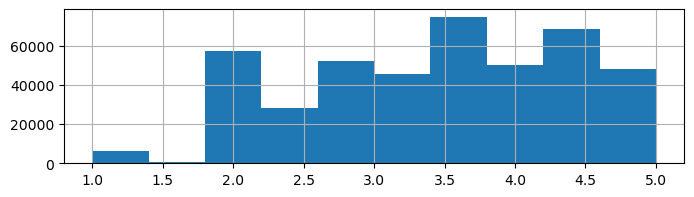

In [ ]:
# проверим распределение выборки после заполнения пропусков
train['condition'].hist(figsize=(8,2));
train.loc[((train['odometer']>40000) & (train['odometer']<50000) ), 'condition'].describe().to_frame().transpose()

In [ ]:
train.loc[((train['odometer']>50000) & (train['odometer']<60000) ), 'condition'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
condition,32103.0,3.487708,0.761446,1.0,2.9,3.6,4.1,5.0


In [ ]:
train.loc[((train['odometer']>50000) & (train['odometer']<60000) & train['condition'].isna()), 'condition'] = train.loc[
    ((train['odometer']>50000) & (train['odometer']<60000) & train['condition'].isna()), 'condition'].fillna(3.5)

In [ ]:
test.loc[((test['odometer']>50000) & (test['odometer']<60000) & test['condition'].isna()), 'condition'] = test.loc[
    ((test['odometer']>50000) & (test['odometer']<60000) & test['condition'].isna()), 'condition'].fillna(3.5)

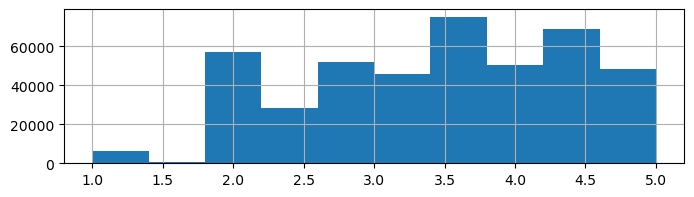

In [ ]:
# проверим распределение выборки после заполнения пропусков
train.loc[((train['odometer']>50000) & (train['odometer']<60000) ), 'condition'].describe().to_frame().transpose()
train['condition'].hist(figsize=(8,2));

In [ ]:
train.loc[((train['odometer']>60000) & (train['odometer']<80000) ), 'condition'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
condition,44320.0,3.341519,0.808816,1.0,2.8,3.5,3.9,5.0


In [ ]:
train.loc[((train['odometer']>60000) & (train['odometer']<80000) & train['condition'].isna()), 'condition'] = train.loc[
    ((train['odometer']>60000) & (train['odometer']<80000) & train['condition'].isna()), 'condition'].fillna(3.45)

In [ ]:
test.loc[((train['odometer']>60000) & (test['odometer']<80000) & test['condition'].isna()), 'condition'] = test.loc[
    ((test['odometer']>60000) & (test['odometer']<80000) & test['condition'].isna()), 'condition'].fillna(3.45)

,count,mean,std,min,25%,50%,75%,max
condition,45102.0,3.343399,0.801899,1.0,2.8,3.5,3.9,5.0


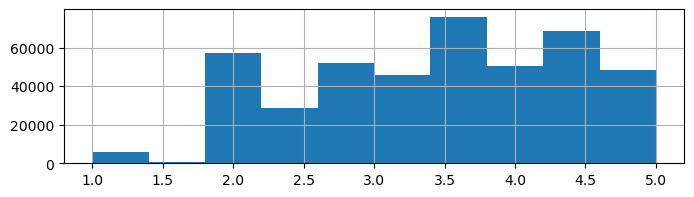

In [ ]:
# проверим распределение выборки после заполнения пропусков
train['condition'].hist(figsize=(8,2));
train.loc[((train['odometer']>60000) & (train['odometer']<80000) ), 'condition'].describe().to_frame().transpose()

In [ ]:
train.loc[((train['odometer']>80000) & (train['odometer']<100000) ), 'condition'].describe().to_frame().transpose()


,count,mean,std,min,25%,50%,75%,max
condition,39637.0,3.09258,0.829919,1.0,2.4,3.1,3.7,5.0


In [ ]:
train.loc[((train['odometer']>80000) & (train['odometer']<100000) & train['condition'].isna()), 'condition'] = train.loc[
    ((train['odometer']>80000) & (train['odometer']<100000) & train['condition'].isna()), 'condition'].fillna(3)

In [ ]:
test.loc[((test['odometer']>80000) & (test['odometer']<100000) & test['condition'].isna()), 'condition'] = test.loc[
    ((test['odometer']>80000) & (test['odometer']<100000) & test['condition'].isna()), 'condition'].fillna(3)

,count,mean,std,min,25%,50%,75%,max
condition,40894.0,3.089734,0.817221,1.0,2.5,3.0,3.7,5.0


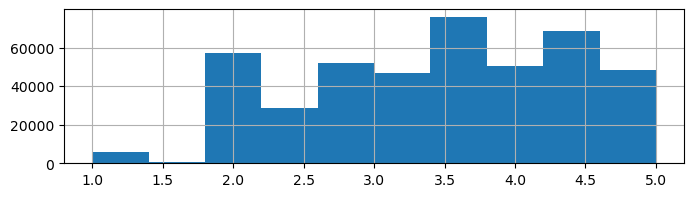

In [ ]:
# проверим распределение выборки после заполнения пропусков
train['condition'].hist(figsize=(8,2));
train.loc[((train['odometer']>80000) & (train['odometer']<100000) ), 'condition'].describe().to_frame().transpose()

In [ ]:
train.loc[((train['odometer']>100000) & (train['odometer']<150000) ), 'condition'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
condition,67842.0,2.740674,0.792235,1.0,2.0,2.7,3.4,5.0


In [ ]:
train.loc[((train['odometer']>100000) & (train['odometer']<150000) & train['condition'].isna()), 'condition'] = train.loc[
    ((train['odometer']>100000) & (train['odometer']<150000) & train['condition'].isna()), 'condition'].fillna(2.7)

In [ ]:
test.loc[((test['odometer']>100000) & (test['odometer']<150000) & test['condition'].isna()), 'condition'] = test.loc[
    ((test['odometer']>100000) & (test['odometer']<150000) & test['condition'].isna()), 'condition'].fillna(2.7)

,count,mean,std,min,25%,50%,75%,max
condition,71213.0,2.738749,0.773304,1.0,2.0,2.7,3.4,5.0


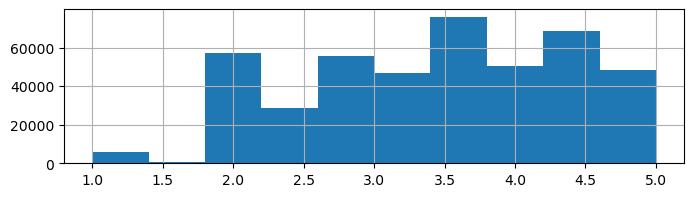

In [ ]:
# проверим распределение выборки после заполнения пропусков
train['condition'].hist(figsize=(8,2));
train.loc[((train['odometer']>100000) & (train['odometer']<150000) ), 'condition'].describe().to_frame().transpose()

In [ ]:
train['condition'].isna().sum()

2531

 Дальше заполнять по этому принципу не вижу смысла, так как уже разбег очень сильный в значениях, учитывая, что машины с пробегом после 150 тыс это уже редкие значения.

In [ ]:
train[['odometer']].quantile([0.02,0.05, 0.1, .5, .65, .75, .85, .93, .99]).transpose()

,0.02,0.05,0.10,0.50,0.65,0.75,0.85,0.93,0.99
odometer,5856.32,10475.0,15616.0,52098.0,77689.9,99272.0,125266.0,157501.38,226987.68


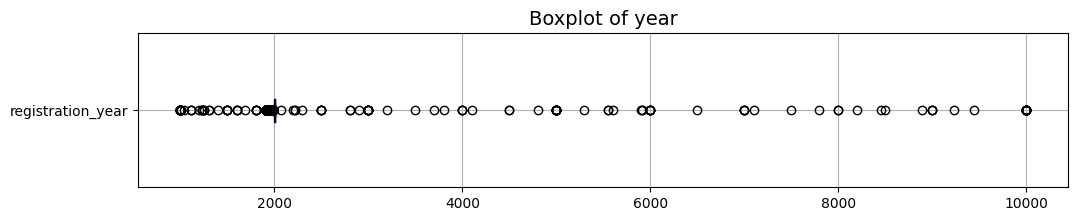

In [ ]:
train[['year']].quantile([0.02,0.05, 0.1, .5, .65, .75, .85, .9, .99]).transpose()


,0.02,0.05,0.10,0.50,0.65,0.75,0.85,0.90,0.99
year,2000.0,2002.0,2004.0,2012.0,2012.0,2013.0,2014.0,2014.0,2015.0


In [ ]:
test[['year']].quantile([0.02,0.05, 0.1, .5, .65, .75, .85, .9, .99]).transpose()


,0.02,0.05,0.10,0.50,0.65,0.75,0.85,0.90,0.99
year,2000.0,2002.0,2004.0,2012.0,2012.0,2013.0,2014.0,2014.0,2015.0


Видим, что в данных есть около 2% автомобилей до 2000 года производства.

**ODOMETER**

In [ ]:
# проанализируем признак odometer
train['odometer'].head()

0    111041.0
1     31034.0
2     35619.0
3    131301.0
4    127709.0
Name: odometer, dtype: float64

Этот признак содержит данные о пробеге автомобилей.
Чтобы было удобнее работать с этим признаком разделим все значения на 1000.

In [ ]:
train['odometer'] = train['odometer']/1000
train['odometer'].head()

0    111.041
1     31.034
2     35.619
3    131.301
4    127.709
Name: odometer, dtype: float64

In [ ]:
test['odometer'] = test['odometer']/1000
test['odometer'].head()

0    116.970
1      6.286
2     11.831
3     57.105
4     31.083
Name: odometer, dtype: float64

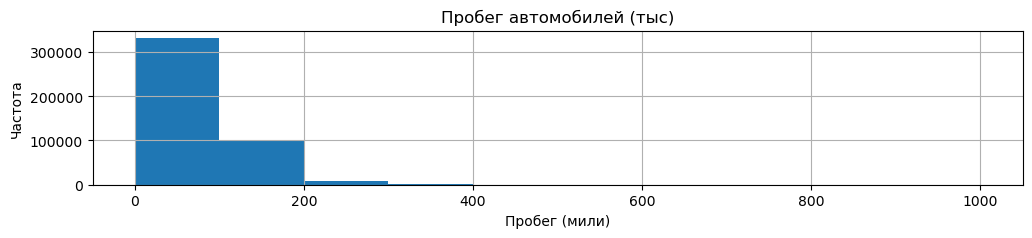

In [ ]:
train['odometer'].hist(figsize=(12, 2))
plt.title('Пробег автомобилей (тыс)')
plt.xlabel('Пробег (мили)')
plt.ylabel('Частота')
plt.show()


На графике видно, что основная масса автомобилей имеет пробег до 200 тыс, проанализируем количество автомобилей с пробегом более 200 тыс.

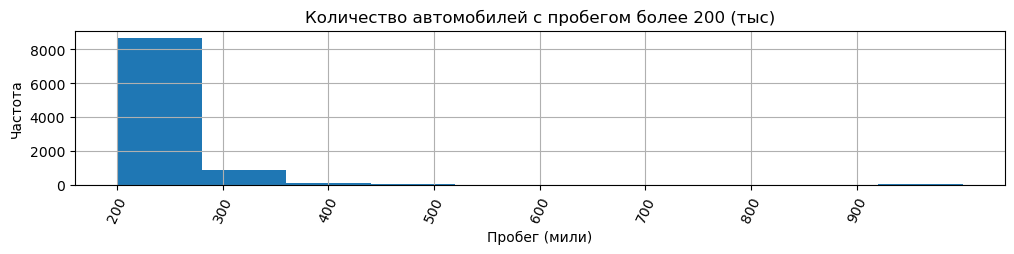

In [ ]:
# построим гистограмму для распределения количества автомобилей с пробегом от 200 тыс
train.loc[train['odometer']>200, 'odometer'].hist(figsize=(12, 2))
plt.xticks([j for j in range(200, 1000, 100)], rotation=65)
plt.title('Количество автомобилей с пробегом более 200 (тыс)')
plt.xlabel('Пробег (мили)')
plt.ylabel('Частота')
plt.show()


In [ ]:
train[['odometer']].quantile([0.02,0.05,0.5,.65, .75, .85, .9, .9825, .99]).transpose()


,0.0200,0.0500,0.5000,0.6500,0.7500,0.8500,0.9000,0.9825,0.9900
odometer,5.85632,10.475,52.098,77.6899,99.272,125.266,143.186,207.879475,226.98768


In [ ]:
test[['odometer']].quantile([0.02,0.05,0.5, .65, .75, .85, .9, .9825, .99]).transpose()

,0.0200,0.0500,0.5000,0.6500,0.7500,0.8500,0.9000,0.9825,0.9900
odometer,5.878,10.519,51.922,77.2082,98.8525,124.3126,142.5648,206.715335,226.68594


Лишь менее 2 процентов автомобилей имеют пробег более 200 тыс., это очень редкие значения, но учитывая что не можем их удалить, мы оставим эти данные.

Пробег менее 5 тыс километров так же редко встречается, и  это вполне логичное явление для автомобилей, со свежим сроком выпуска.

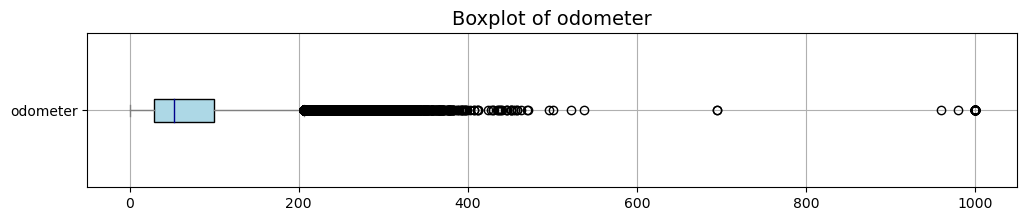

In [ ]:
train.boxplot(column=['odometer'], figsize=(12, 2),
             vert=False,
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            whiskerprops=dict(color='gray'),
            medianprops=dict(color='darkblue'),
            capprops=dict(color='gray')).set_title('Boxplot of odometer', fontsize=14);

In [ ]:
#заполним пропуски заглушкой
train['odometer'].fillna(-999, inplace=True)
test['odometer'].fillna(-999, inplace=True)
print ('Количество пропущенных значений в odometer:')
print ('train', train['odometer'].isna().sum())
print ('test',test['odometer'].isna().sum())

Количество пропущенных значений в odometer:
train 0
test 0


**Проанализируем категориальные признаки**

In [ ]:
train[cat_features].head(10)

,make,model,trim,body,transmission,state,color,interior,seller
0,Ford,Edge,SEL,suv,automatic,md,black,black,santander consumer
1,Ford,Fusion,SE,Sedan,automatic,mo,black,black,ars/avis budget group
2,Nissan,Sentra,2.0 SL,sedan,automatic,nj,black,black,nissan-infiniti lt
3,HUMMER,H2,Base,suv,automatic,tx,gold,beige,wichita falls ford lin inc
4,Ford,Fusion,SEL,Sedan,automatic,md,black,black,purple heart
5,Lincoln,MKZ,Base,Sedan,automatic,mi,black,black,"ford motor credit company,llc"
6,pontiac,g6,4c,no_info,automatic,nc,silver,black,north state acceptance
7,Ford,Escape,SE,SUV,automatic,fl,blue,gray,fields bmw
8,Hyundai,Elantra,GLS,Sedan,automatic,oh,black,tan,dt inventory
9,Ford,Freestyle,Limited,wagon,automatic,oh,black,tan,wells fargo dealer services


В категориальных признаках мы видим следующие проблемы:
- разный регистр;
- пробелы;
- разные знаки внутри слов;
- цифры написаны слитно со словами.


In [ ]:
for column in cat_features:
    print (column, train[column].nunique())
    print ()

make 93

model 960

trim 1923

body 86

transmission 3

state 38

color 21

interior 18

seller 13025



In [ ]:
for column in cat_features:
    print (column, test[column].nunique())
    print ()

make 86

model 825

trim 1497

body 78

transmission 3

state 38

color 21

interior 18

seller 7623



In [ ]:
def transform_values(df):
    # заменяем пробелы на underscore
    df = df.applymap(lambda x: x.replace(' ', '_') if isinstance(x, str) else x)

    # заменяем дефис на underscore
    df = df.applymap(lambda x: x.replace('-', '_') if isinstance(x, str) else x)

    # добавляем underscore между словом и цислом
    df = df.applymap(lambda x: '_'.join(part for part in x.split() if not part.isdigit()) if isinstance(x, str) else x)
    # приводим к строчному регистру
    df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

    return df

In [ ]:
train = transform_values(train)
train.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sellingprice,sale_year,sale_month
0,2011,ford,edge,sel,suv,automatic,md,4.2,111.041,black,black,santander_consumer,12500,2015,6
1,2014,ford,fusion,se,sedan,automatic,mo,3.5,31.034,black,black,ars/avis_budget_group,14500,2015,2
2,2012,nissan,sentra,2.0_sl,sedan,automatic,nj,2.2,35.619,black,black,nissan_infiniti_lt,9100,2015,6
3,2003,hummer,h2,base,suv,automatic,tx,2.8,131.301,gold,beige,wichita_falls_ford_lin_inc,13300,2015,6
4,2007,ford,fusion,sel,sedan,automatic,md,2.0,127.709,black,black,purple_heart,1300,2015,2


In [ ]:
for column in cat_features:
    print (column, train[column].nunique())
    print ()

make 63

model 827

trim 1832

body 45

transmission 3

state 38

color 21

interior 18

seller 13018



In [ ]:
test = transform_values(test)
test.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sale_year,sale_month
0,2005,cadillac,cts,base,sedan,automatic,ca,2.7,116.970,silver,black,lexus_of_stevens_creek,2015,1
1,2014,gmc,savana_cargo,,van,no_info,pa,4.4,6.286,white,gray,u_haul,2015,2
2,2013,nissan,murano,s,suv,automatic,oh,4.6,11.831,gray,black,nissan_infiniti_lt,2015,2
3,2013,chevrolet,impala,ls_fleet,sedan,automatic,fl,2.3,57.105,silver,black,onemain_rem/auto_club_of_miami_inc_dba_north_dad,2015,3
4,2013,nissan,titan,sv,crew_cab,automatic,tn,2.9,31.083,black,black,nissan_north_america_inc.,2015,6


In [ ]:
for column in cat_features:
    print (column, test[column].nunique())
    print ()

make 59

model 734

trim 1446

body 42

transmission 3

state 38

color 21

interior 18

seller 7619



In [ ]:
train['make'].nunique()

63

In [ ]:
train['make'] = train['make'].replace({'mercedes_benz': 'mercedes',
                                       'mercedes_b': 'mercedes',
                                       'vw': 'volkswagen',
                                      'land_rover':'landrover',
                                      'ford_truck':'ford',
                                      'mazda_tk':'mazda',
                                      'dodge_tk':'dodge',
                                      'gmc_truck':'gmc',
                                      'hyundai_tk':'hyundai',
                                     'ford_tk':'ford'})
print (train['make'].nunique())

55


In [ ]:
test['make'].nunique()

59

In [ ]:
test['make'] = test['make'].replace({'mercedes_benz': 'mercedes',
                                       'mercedes_b': 'mercedes',
                                       'vw': 'volkswagen',
                                      'land_rover':'landrover',
                                      'ford_truck':'ford',
                                      'mazda_tk':'mazda',
                                      'dodge_tk':'dodge',
                                      'gmc_truck':'gmc',
                                      'hyundai_tk':'hyundai',
                                     'ford_tk':'ford'})
print (test['make'].nunique())

54


**Посмотрим какие модели встречаются чаще всего**

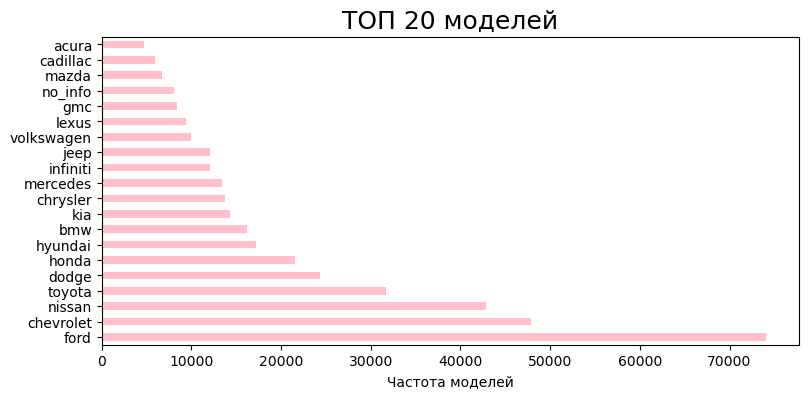

In [ ]:
plt.figure(figsize=(9,4))
train['make'].value_counts().nlargest(20).plot(kind='barh', color = 'pink')
plt.xlabel('Частота моделей')
plt.title("TOП 20 моделей",fontsize=18)
plt.show()

Почистим от неявных дубликатов самые распространенные марки.

In [ ]:
for make in train['make'].unique():
    print(make,
          train.loc[train['make']==make, 'model'].nunique(),
          train.loc[train['make']==make, 'model'].unique())
    print()

ford 64 ['edge' 'fusion' 'escape' 'freestyle' 'windstar' 'taurus' 'explorer'
 'f_150' 'flex' 'mustang' 'expedition' 'five_hundred' 'e_series_van'
 'focus' 'fusion_hybrid' 'explorer_sport_trac' 'f_250_super_duty' 'ranger'
 'fiesta' 'f_350_super_duty' 'f150' 'crown_victoria' 'e_series_wagon'
 'freestar' 'transit_connect' 'econoline_cargo' 'f_450_super_duty'
 'expedition_el' 'escort' 'c_max_hybrid' 'c_max_energi' 'escape_hybrid'
 'shelby_gt500' 'explorer_sport' 'taurus_x' 'expeditn' 'excursion'
 'econoline_wagon' 'fusion_energi' 'mustang_svt_cobra' 'f_150_heritage'
 'police' 'focus_st' 'thunderbird' 'e350' 'e150' 'excurs' 'e'
 'transit_van' 'crown' 'contour' 'e_250' 'e_150' 'transit_wagon' 'e250'
 'f250' 'windstar_cargo' 'f_150_svt_lightning' 'f350' 'expedit' 'tempo'
 'e_350' 'aspire' 'f_250']

nissan 31 ['sentra' 'murano' 'armada' 'altima' 'rogue' 'maxima' 'versa' 'pathfinder'
 'cube' 'rogue_select' 'frontier' '370z' 'quest' 'leaf' 'titan' 'xterra'
 'nv_cargo' 'juke' 'altima_hybrid' '350

In [ ]:
# удалим неявные дубликаты
train['model'] = train['model'].replace({'mountnr': 'mountaineer',
                                       'mazdaspeed_mazda3': 'mazdaspeed3',
                                      'mazdaspeed_mx_5_miata':'mx_5_miata',
                                      'e150':'e_150',
                                      'f150':'f_150',
                                      'e350':'e_350',
                                      'e250':'e_250',
                                          'expeditn': 'expedition',
                                         'expedit': 'expedition',
                                        'crown': 'crown_victoria',
                                         'excurs' : 'excursion',
                                         'e150' : 'e_150',
                                         'e250':'e_250'  ,
                                         'e350' :  'e_350' ,
                                         'f250':'f_250',
                                          'f150':'f_150',
                                         'f350':'f_350',
                                        'subrbn':'suburban',
                                        'e':'e_series',
                                        'silverado_2500':'silverado_2500hd',
                                         'silverado_3500': 'silverado_3500hd',
                                       'capt':'captiva',
                                       'uplandr':'uplander',
                                       's10':'s_10'})

In [ ]:
test['model'] = test['model'].replace({'mountnr': 'mountaineer',
                                       'mazdaspeed_mazda3': 'mazdaspeed3',
                                      'mazdaspeed_mx_5_miata':'mx_5_miata',
                                      'e150':'e_150',
                                      'f150':'f_150',
                                      'e350':'e_350',
                                      'e250':'e_250',
                                          'expeditn': 'expedition',
                                         'expedit': 'expedition',
                                        'crown': 'crown_victoria',
                                         'excurs' : 'excursion',
                                         'e150' : 'e_150',
                                         'e250':'e_250'  ,
                                         'e350' :  'e_350' ,
                                         'f250':'f_250',
                                          'f150':'f_150',
                                         'f350':'f_350',
                                        'subrbn':'suburban',
                                        'e':'e_series',
                                       'silverado_2500':'silverado_2500hd',
                                         'silverado_3500': 'silverado_3500hd',
                                       'capt':'captiva',
                                       'uplandr':'uplander',
                                       's10':'s_10'
                                      })

In [ ]:
for make in train['make'].unique():
    print(make,
          train.loc[train['make']==make, 'model'].nunique())
    print()

ford 55

nissan 31

hummer 5

lincoln 17

pontiac 19

hyundai 21

no_info 1

buick 14

chevrolet 66

honda 18

acura 14

cadillac 23

gmc 29

saab 4

dodge 29

mercedes 37

toyota 31

volkswagen 24

bmw 41

infiniti 35

chrysler 19

kia 14

jaguar 8

subaru 11

jeep 9

lexus 39

scion 6

fiat 3

suzuki 14

mazda 26

volvo 16

audi 27

mini 6

isuzu 7

mitsubishi 16

smart 2

porsche 8

landrover 13

saturn 12

ram 6

oldsmobile 12

mercury 15

bentley 8

fisker 1

maserati 7

tesla 1

rolls_royce 1

ferrari 3

plymouth 5

lamborghini 1

geo 2

aston_martin 3

daewoo 1

dot 1

airstream 1



**color**

In [ ]:
train['color'].value_counts()

black        87115
white        84149
silver       65667
gray         65284
blue         40237
red          34514
—            19520
green         8975
gold          8934
beige         7257
burgundy      7059
brown         5320
orange        1629
purple        1250
off_white     1143
yellow         979
no_info        586
charcoal       389
turquoise      183
pink            32
lime            14
Name: color, dtype: int64

Пробовала уменьшить количество категорий в признаке, добавив признак other, но модель потеряла 0.3

**body**

In [ ]:
train['body'].value_counts().sort_index().index

Index(['access_cab', 'beetle_convertible', 'cab_plus', 'cab_plus_4',
       'club_cab', 'convertible', 'coupe', 'crew_cab', 'crewmax_cab',
       'cts_coupe', 'cts_v_coupe', 'cts_v_wagon', 'cts_wagon', 'double_cab',
       'e_series_van', 'elantra_coupe', 'extended_cab', 'g37_convertible',
       'g37_coupe', 'g_convertible', 'g_coupe', 'g_sedan', 'genesis_coupe',
       'granturismo_convertible', 'hatchback', 'king_cab', 'koup', 'mega_cab',
       'minivan', 'no_info', 'promaster_cargo_van', 'q60_convertible',
       'q60_coupe', 'quad_cab', 'ram_van', 'regular_cab', 'sedan', 'supercab',
       'supercrew', 'suv', 'transit_van', 'tsx_sport_wagon', 'van', 'wagon',
       'xtracab'],
      dtype='object')

In [ ]:
test['body'].value_counts().sort_index().index

Index(['access_cab', 'beetle_convertible', 'cab_plus', 'club_cab',
       'convertible', 'coupe', 'crew_cab', 'crewmax_cab', 'cts_coupe',
       'cts_v_coupe', 'cts_wagon', 'double_cab', 'e_series_van',
       'elantra_coupe', 'extended_cab', 'g37_convertible', 'g37_coupe',
       'g_convertible', 'g_coupe', 'g_sedan', 'genesis_coupe',
       'granturismo_convertible', 'hatchback', 'king_cab', 'koup', 'mega_cab',
       'minivan', 'no_info', 'promaster_cargo_van', 'q60_convertible',
       'q60_coupe', 'quad_cab', 'regular_cab', 'sedan', 'supercab',
       'supercrew', 'suv', 'transit_van', 'tsx_sport_wagon', 'van', 'wagon',
       'xtracab'],
      dtype='object')

Дубликатов не наблюдается.

In [ ]:
list(train.columns)

['year',
 'make',
 'model',
 'trim',
 'body',
 'transmission',
 'state',
 'condition',
 'odometer',
 'color',
 'interior',
 'seller',
 'sellingprice',
 'sale_year',
 'sale_month']

### Модели

In [ ]:
#Разделим выборки
train_data, validation = train_test_split(train, random_state=42)
print(train_data.shape[0])
print(validation.shape[0])

330177
110059


In [ ]:
#выделим обучающие признаки и целевой признак
X = ['year', 'make', 'model', 'trim', 'body', 'transmission', 'state','condition', 'odometer', 'color',
     'interior', 'seller', 'sale_year','sale_month']
y = ['sellingprice']

In [ ]:
train_pool = Pool(data=train_data[X],
                  label=train_data[y],
                  cat_features=cat_features)
print(train_pool.shape[0])

330177


In [ ]:
validation_pool = Pool(data=validation[X],
                       label=validation[y],
                  cat_features=cat_features)
print(validation_pool.shape[0])

110059


In [ ]:
test_pool = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features)
print(test_pool.shape[0])

440236


## RandomGridSearch

In [ ]:
# параметры для перебора
param_grid = {
    'iterations':[3000, 4000, 100],
    'learning_rate': [0.01, 0.10],
    'depth': [6, 15],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

In [ ]:
params = {
    'cat_features': cat_features,
    'eval_metric': 'MAPE',
    'loss_function': 'RMSE',
    'random_seed': 42,
    'verbose': 100,
    'early_stopping_rounds':15
}

In [ ]:
#инициализируем модель
model = CatBoostRegressor(**params)

In [ ]:
now = datetime.datetime.now()

print(now)

2023-06-03 18:30:52.109498


In [ ]:
%%time
randomized_search_result = model.randomized_search(param_grid,
                                                   train_pool)
print (model.best_score_)

0:	learn: 0.9861259	test: 0.9846813	best: 0.9846813 (0)	total: 771ms	remaining: 51m 21s
100:	learn: 0.5148948	test: 0.4568692	best: 0.4568692 (100)	total: 57.3s	remaining: 36m 51s
200:	learn: 0.4445060	test: 0.3614411	best: 0.3614411 (200)	total: 1m 50s	remaining: 34m 57s
300:	learn: 0.4072675	test: 0.3234615	best: 0.3234615 (300)	total: 2m 47s	remaining: 34m 19s
400:	learn: 0.3890189	test: 0.3009126	best: 0.3009126 (400)	total: 3m 33s	remaining: 31m 56s
500:	learn: 0.3642763	test: 0.2764855	best: 0.2764855 (500)	total: 4m 29s	remaining: 31m 19s
600:	learn: 0.3448643	test: 0.2602953	best: 0.2602953 (600)	total: 5m 26s	remaining: 30m 44s
700:	learn: 0.3337896	test: 0.2505443	best: 0.2505443 (700)	total: 6m 22s	remaining: 30m 1s
800:	learn: 0.3257570	test: 0.2447208	best: 0.2447208 (800)	total: 7m 18s	remaining: 29m 9s
900:	learn: 0.3193707	test: 0.2402522	best: 0.2402522 (900)	total: 8m 12s	remaining: 28m 14s
1000:	learn: 0.3116992	test: 0.2363184	best: 0.2363184 (1000)	total: 9m 8s	rem

In [ ]:
now = datetime.datetime.now()

print(now)

In [ ]:
best_params = randomized_search_result['params']
best_params

In [ ]:
# оцениваем
y_pred = model.predict(validation_pool)

NameError: name 'model' is not defined

In [ ]:
rmse = mean_squared_error(validation[y], y_pred, squared=False)

#  MAPE
mape = mean_absolute_percentage_error(validation[y], y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}%")

best_params = {'depth': 9,
               'iterations': 3000,
               'learning_rate': 0.07555198107934782,
               'l2_leaf_reg': 8.206677907347204,
               'cat_features': cat_features,
    'eval_metric': 'MAPE',
    'loss_function': 'RMSE',
    'random_seed': 42,
    'verbose': False,
    'early_stopping_rounds' : 15}

In [ ]:
fstrs = model.get_feature_importance(prettified=True)

fig, ax = plt.subplots()
fstrs.plot(x='Feature Id', y='Importances', kind='bar', ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel("Значение")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
best_model = CatBoostRegressor(**best_params,
                               random_seed= 42,
                              verbose = 100,
                              iterations = 1600)

In [ ]:
%%time
# обучаем модель
best_model.fit(test_pool)
print (best_model.best_score_)

In [ ]:
y_pred_test = model.predict(test[X])
y_pred_test

In [ ]:
test_vin = pd.read_csv('/kaggle/input/copy-of-used-cars-price-prediction-ds18/test.csv')
test_vin['vin'].head()

In [ ]:
prediction = pd.DataFrame()
prediction.head()

In [ ]:
prediction['vin']=test_vin['vin']
prediction.head()

In [ ]:
prediction['sellingprice']=y_pred_test
prediction.head()

In [ ]:
prediction.loc[prediction['sellingprice']<250, 'sellingprice']=250
prediction.loc[prediction['sellingprice']<250].shape[0]

In [ ]:
prediction.to_csv('result_10.csv', index = False)

**optuna**

In [ ]:
%%time
def objective(trial):
    # параметры модели
    params = {
        'iterations': trial.suggest_int('iterations',3000, 4000),
        'learning_rate': trial.suggest_float('learning_rate', 0.09, 0.12),
        'depth': trial.suggest_int('depth', 9, 15),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 6, 13),
        'random_state': 42,
        'cat_features': cat_features
    }

    # создаем CatBoost model
    model = CatBoostRegressor(**params)
    model.fit(train_pool, verbose=100)

    # предсказания на валидационной выборке
    predictions = model.predict(validation_pool)

    # важность признаков
    feature_importance = model.get_feature_importance(type = catboost.EFstrType.FeatureImportance)

    # считаем RMSE учитывая важность признаков
    weighted_rmse = mean_squared_error(validation[y], predictions, squared=False)

    for i, feature in enumerate(cat_features):
        if feature in feature_importance:
            weighted_rmse *= feature_importance[i]

    return weighted_rmse

# создаем study
study = optuna.create_study(direction='minimize')

# параметры оптимизации
study.optimize(objective, n_trials=5)

# выводим лучшие гиперпараметры и score
best_params = study.best_params
print(best_params)
print (study.best_score)

- Trial 0 finished with value: 2970.804679660054 and parameters:
        {'learning_rate': 0.06904379720513099,
         'depth': 4, 'l2_leaf_reg': 6.53124581544504}.
Best is trial 0 with value: 2970.804679660054.
- Trial 1 finished with value: 2645.160734104553 and parameters:
        {'learning_rate': 0.016135796081846888,
         'depth': 10,
         'l2_leaf_reg': 9.085872840748877}.
**Best is trial 1** with value: 2645.160734104553.

- Trial 2 finished with value: 2331.735905736237 and parameters:
        {'learning_rate': 0.08296668738211416, 'depth': 8, 'l2_leaf_reg': 7.135107529142273}.
**Best is trial 2** with value: 2331.735905736237.

- Trial 3 finished with value: 2632.341885837149 and parameters:
{'learning_rate': 0.06590501267678682, 'depth': 6, 'l2_leaf_reg': 6.5895906392406545}.
**Best is trial 2** with value: 2331.735905736237.

- Trial 4 finished with value: 3023.684888090036 and parameters:
{'learning_rate': 0.06177043795759185, 'depth': 4, 'l2_leaf_reg': 1.576680898996981}.
**Best is trial 2** with value: 2331.735905736237.

- Trial 5 finished with value: 2671.663728042232 and parameters: {'learning_rate': 0.03717361275601939, 'depth': 7, 'l2_leaf_reg': 6.827239019420514}.
**Best is trial 2** with value: 2331.735905736237.

- Trial 6 finished with value: 3022.7638694981424 and parameters: {'learning_rate': 0.02329988351343336, 'depth': 6, 'l2_leaf_reg': 8.916518291038535}. Best is trial 2 with value: 2331.735905736237.
- Trial 19 {'learning_rate':0.11597820817007716, 'depth': 13, 'l2_leaf_reg': 0.37933443309451775}
Trial 0 finished with value: 2228.906500663646 and parameters: {'learning_rate': 0.1260277017289611, 'depth': 9, 'l2_leaf_reg': 5.28804481342274}.
**Best is trial 0 with value: 2228.906500663646** .

Trial 11 finished with value: 2168.4043705101267 and parameters:
{'learning_rate': 0.11760637337592622, 'depth': 10, 'l2_leaf_reg': 3.0940654814585535}.
Best is trial 11 with value: 2168.4043705101267 .
Trial 13 finished with value: 2151.3242926113417 and parameters: {'learning_rate': 0.14511452039160722, 'depth': 10, 'l2_leaf_reg': 2.3470051891954804}.
Best is trial 13 with value: 2151.3242926113417.
arison
[I 2023-05-29 02:26:30,577] Trial 35 finished with value: 2191.9948118095012 and parameters: {'learning_rate': 0.12574274038155134, depth': 10, 'l2_leaf_reg': 1.09069287356834}. **Best is trial 25 with value: 2133.514994824393**

Trial 6 finished with value: 2141.4428581143584 and parameters: {'learning_rate': 0.11956200408474056, 'depth': 12, 'l2_leaf_reg': 8.811200920186481}.
est is trial 6 with value: 2141.4428581143584.
Trial 1 finished with value: 2168.0703315307874 and parameters: {'learning_rate': 0.11858257053327896, 'depth': 11, 'l2_leaf_reg': 9.270322764969738}. Best is trial 1 with value: 2168.0703315307874.
Trial 0 failed with parameters: {'iterations': 3304, 'learning_rate': 0.09040243409768059, 'depth': 12, 'l2_leaf_reg': 11.711812961320431} because of the following error: NameError("name 'categorical_features' is not defined")

#лучшие параметры
best_params = {'depth': 12,
               'iterations': 1000,
               'learning_rate': 0.11956200408474056,
               'l2_leaf_reg': 8.811200920186481}

In [ ]:
best_model = CatBoostRegressor(loss_function='RMSE',
                               random_seed=42,
                               verbose=False,
                               **best_params)

In [ ]:
%%time
# обучаем модель
best_model.fit(train_pool)
print (best_model.best_score_)

In [ ]:
y_pred = best_model.predict(validation_pool)

# MSE на валидационной
rmse = mean_squared_error(validation[y], y_pred, squared=False)

# MAPE на валидационной
mape = mean_absolute_percentage_error(validation[y], y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}%")

In [ ]:
%%time
# обучаем модель
best_model.fit(test_pool)
print (best_model.best_score_)# оцениваем

In [ ]:
y_pred_test = best_model.predict(test[X])
y_pred_test

In [ ]:
predictions = pd.read_csv('/kaggle/input/copy-of-used-cars-price-prediction-ds18/sample_submission.csv')

In [ ]:
test_vin = pd.read_csv('/kaggle/input/copy-of-used-cars-price-prediction-ds18/test.csv')
test_vin['vin'].head()

In [ ]:
prediction = pd.DataFrame()
prediction.head()

In [ ]:
prediction['vin']=test_vin['vin']
prediction.head()


In [ ]:
prediction['sellingprice']=y_pred_test
prediction.head()

In [ ]:
prediction.to_csv('result8.csv', index = False)
#result.to_json('/Users/anzhelikaboltneva/Desktop/KAGGLE/predictions.json', orient='records')

In [ ]:
then = datetime.datetime.now()
print ('Выполнение тетрадки началось в: ', now.time())
print ('Выполнение тетрадки закончилось в: ', then.time())